# Problem Understanding

## Context

E-Commerce singkatan dari electronic commerce, yang merujuk pada pembelian dan penjualan barang dan jasa melalui internet atau media elektronik lainnya. Hal ini melibatkan berbagai aktivitas online, termasuk belanja online, pembayaran elektronik, perbankan online, pemasaran digital, dan lainnya. E-commerce telah menjadi semakin populer dan penting dalam era digital modern, memungkinkan bisnis dan konsumen untuk terlibat dalam transaksi dan perdagangan tanpa perlu toko fisik atau interaksi tatap muka.

Costumer Churn atau yang dikenal dengan pindahnya pelanggan adalah pemutusan jasa suatu perusahaan oleh pelanggan karena pelanggan tersebut memilih menggunakan jasa layanan lain. Dengan memprediksi churn perusahaan dapat mengidentifikasi churn lebih awal sehingga kerugian perusahaan akibat konsumen yang pindah dapat dihindari. Konsumen adalah aset utama perusahaan sehingga salah satu cara peusahaan mempertahankan konsumen adalah dengan mengenali pelanggan potensial dan harus mampu mempertahankan pelanggan potensial (costumer retention) sehingga dapat mencegah pelanggan menghentikan pembelian dan berpindah ke perusahaan lain (churn).

Churn (Variable Target)

0 : Pelanggan Tetap Menggunakan E-Commerce/Loyal

1 : Pelanggan Meninggalkan E-Commerce/Keluar

**Problem Statement :**

Salah satu permasalahan yang penting dalam bisnis jual beli online adalah bagaimana perusahaan dapat menjaga konsumennya agar tetap loyal dan tidak pindah ke online platform perusahaan lain. Konsumen adalah aset utama perusahaan sehingga salah satu cara perusahaan mempertahankan konsumen yaitu dengan melakukan prediksi pelanggan churn. Dengan melalukan prediksi, perusahaan mampu mengidentifikasi pelanggan potensial (customer  retention) sehingga perusahaan dapat menerapkan strategi pemasaran yang tepat seperti memberikan promo diskon atau cashback kepada pelanggan yang berpotensi churn sehingga dapat mencegah pelanggan tersebut menghentikan pembelian dan berpindah ke perusahaan pesaing (churn). 

Dengan adanya model prediksi pelanggan churn ini, perusahaan dapat meminimalkan kerugian akibat kehilangan sejumlah pelanggan karena perusahaan mampu mengidentifikasi pelanggan yang loyal dan tidak. Sehingga perusahaan mampu mempertahankan konsumen yang loyal terhadap perusahaan dibandingkan dengan harus menarik pelanggan baru yang kemungkinan justru mengeluarkan biaya lebih besar. 

**Goals :**

Berdasarkan permasalahan tersebut, perusahaan harus memiliki tools yang dapat memprediksi pelanggan churn sehingga perusahaan dapat mengambil langkah - langkah antisipatif untuk menjaga pelanggan tersebut. Variabel - variabel yang berpengaruh dalam pelanggan churn diantaranya kapan terakhir order, tenure / masa lama pakai aplikasi, kemudahan dalam menggunakan aplikasi, jumlah promo yang ada dalam aplikasi, jangka waktu pengiriman barang hingga respon dari customer service jika terdapat kendala selama bertransaksi.  

Tujuan pemodelan dengan memprediksi pelanggan churn adalah mengetahui karakteristik pelanggan churn berdasarkan metode klasifikasi. Pemodelan ini diharapkan mampu mengidentifikasi pelanggan churn dan tidak sehingga perusahaan mampu menerapkan strategi customer retention dan costumer churn yang tepat. Dan juga perusahaan dapat mengetahui variable kostumer loyal atau tidak terhadap layanan.

**Analytic Approach :**

 Akan dibuat model klasifikasi yang mampu memprediksi pelanggan yang loyal atau tidak sehingga perusahaan dapat menerapkan strategi yang tepat terhadap customer retention dan costumer churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv(r"D:\Data Science\Learn Python\Capstone Project\Main Data Asli\caps3\data_ecommerce_customer_churn.csv")
df_main

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


**Attributes Information**

| **Attributes** | **Data Types** | **Description** |
| --- | --- | --- |
| `Tenure` | Float | Tenure of a customer in the company. |
| `WarehouseToHome` | Float | Distance between the warehouse to the customer’s home. |
| `NumberOfDeviceRegistered` | Int | Total number of deceives is registered on a particular customer. |
| `PreferedOrderCat` | Object | Preferred order category of a customer in the last month. |
| `SatisfactionScore` | Int | Satisfactory score of a customer on service. |
| `MaritalStatus` | Object | Marital status of a customer. |
| `NumberOfAddress` | Int | Total number of address added on a particular customer. |
| `Complain` | Int | Any complaint has been raised in the last month. |
| `DaySinceLastOrder` | Float | Day since last order by customer. |
| `CashbackAmount` | Float | Average cashback in last month. |
| `Churn` | Int | Churn flag/1 means customer leave and 0 means customer uses the service. |

*Churn* akan menjadi label / target kolom yang akan di prediksi (dependent variable), kolom lain akan menjadi predictor variabel / independent variable yang akan memprediksi *Churn*.

# Data Understanding

In [3]:
listItem = []
for col in df_main.columns:
    listItem.append([col, df_main[col].dtype, 
                     df_main[col].isna().sum(), 
                     round((df_main[col].isna().sum()/len(df_main[col]))*100, 2),
                    df_main[col].nunique(), 
                    list(df_main[col].drop_duplicates().sample(2).values)]);

pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[51.0, 13.0]"
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 14.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Grocery, Mobile]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1]"
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[1, 5]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[31.0, 9.0]"
9,CashbackAmount,float64,0,0.00,2335,"[150.0, 149.38]"


In [4]:
display(df_main.describe(include=['number']))
display(df_main.describe(include=['object']))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


## Numerik

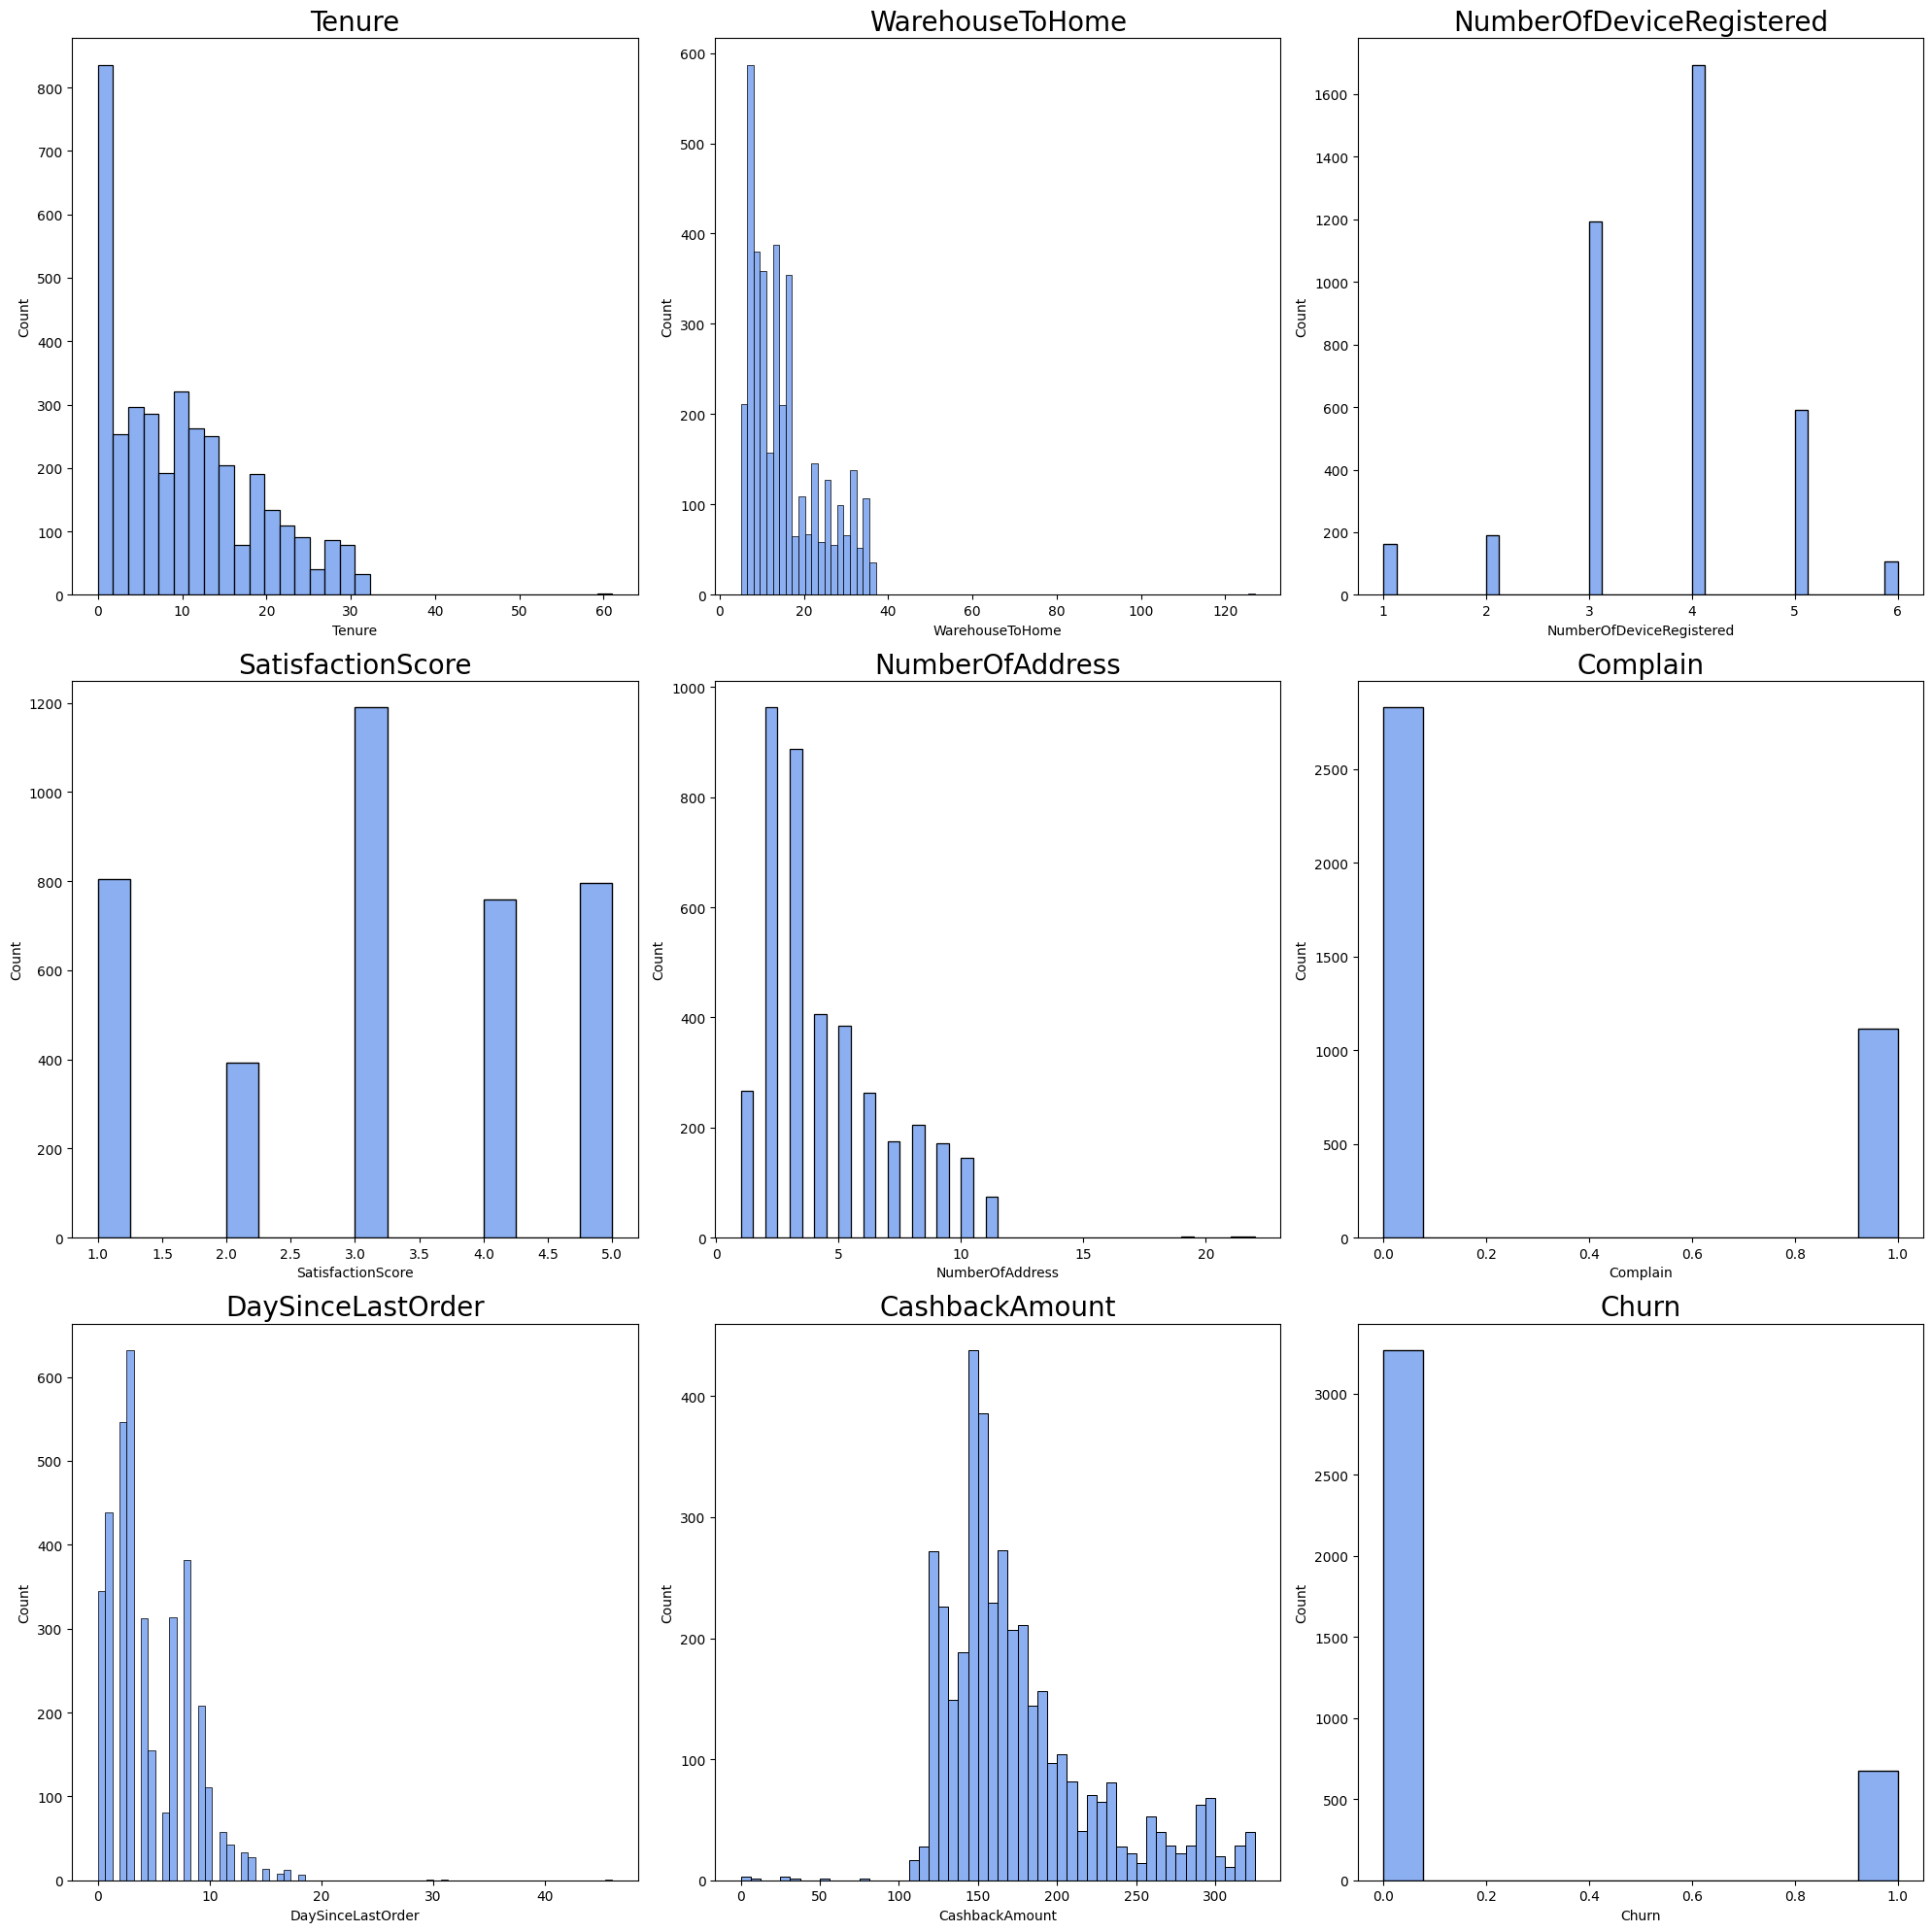

In [6]:
plt.figure(figsize=(20, 20))
plotnumber = 1
num_features = df_main.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data=df_main,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

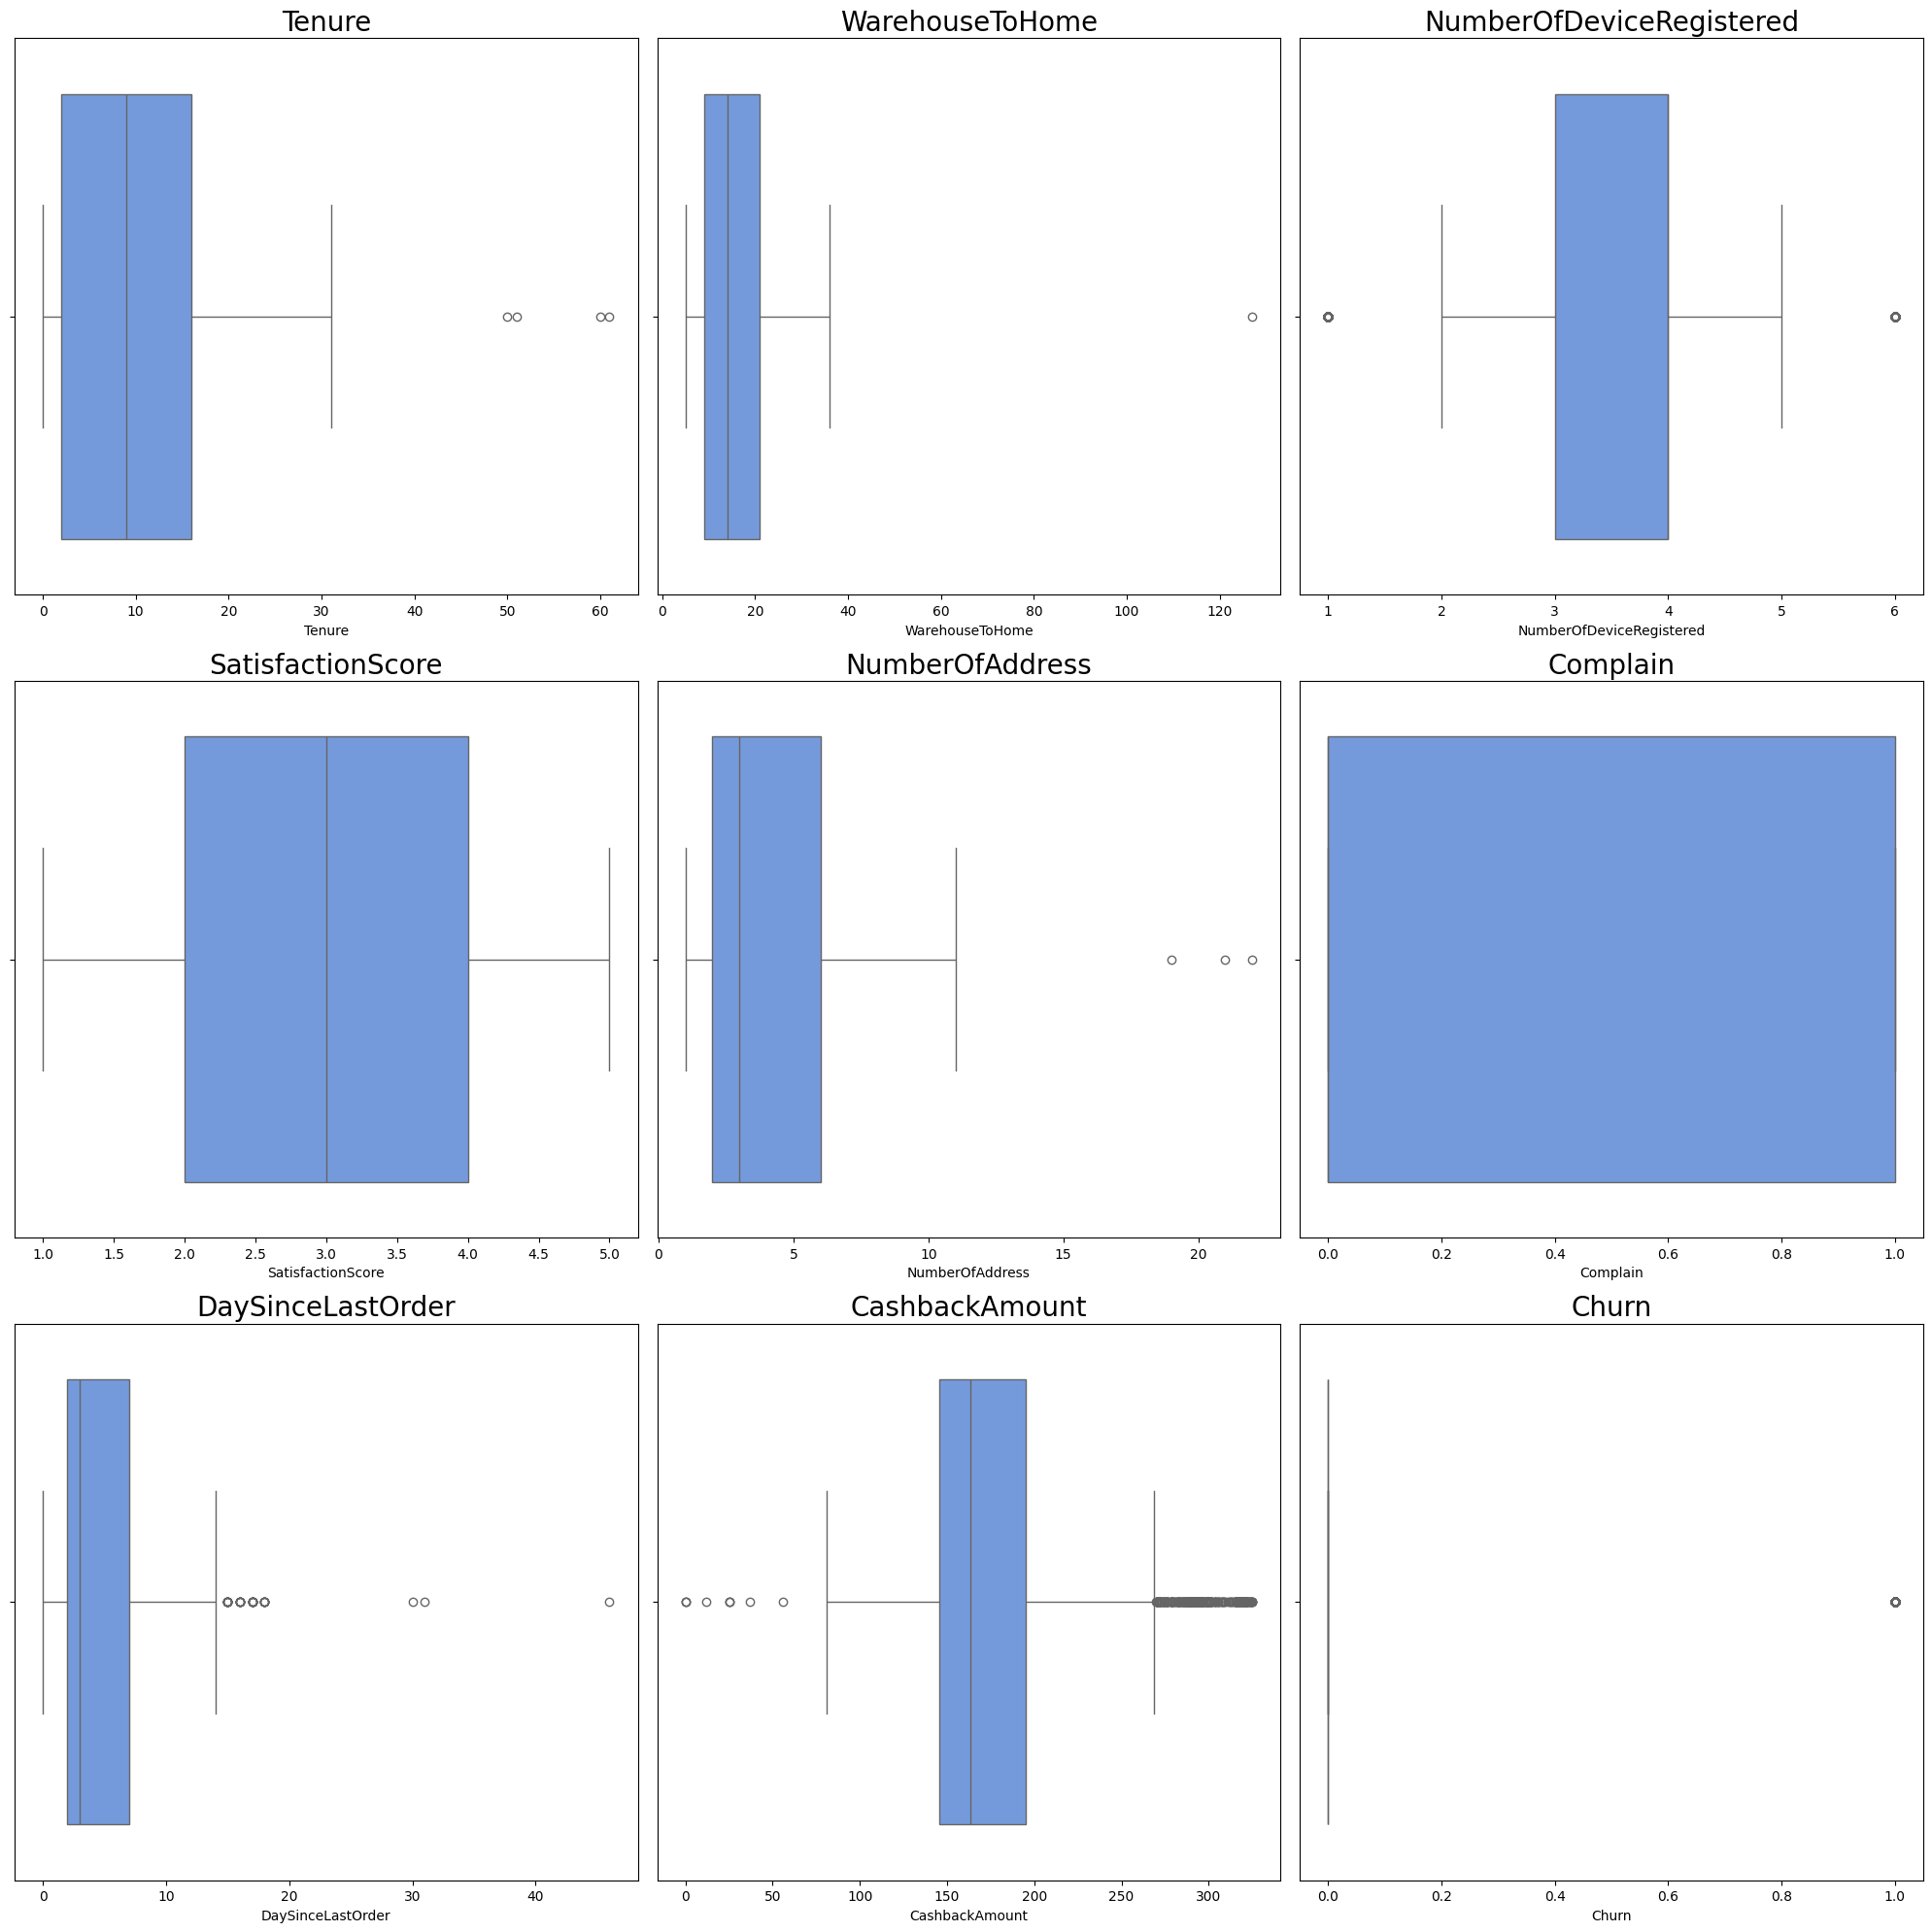

In [7]:
plt.figure(figsize=(20, 20))
plotnumber = 1
num_features = df_main.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.boxplot(data=df_main,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

In [8]:
df_main['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

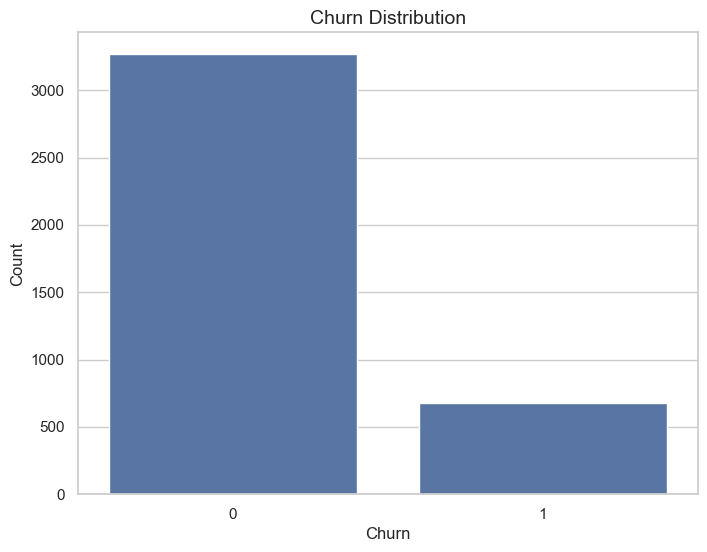

In [9]:
# Assuming df_main is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the counts of each unique value in the 'Churn' column
sns.countplot(data=df_main, x='Churn')

plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Churn Distribution', fontsize=14)

plt.show()

In [10]:
df_numeric = df_main.select_dtypes(include=['number'])

In [11]:
for kolom in df_numeric.columns:
    q1 = df_main[kolom].describe().loc['25%']
    q3 = df_main[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_main[(df_main[kolom] < lower_bound) | (df_main[kolom] > upper_bound)]

    jumlah_outliers = outliers.count()[kolom]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Tenure memiliki outliers 4
data WarehouseToHome memiliki outliers 1
data NumberOfDeviceRegistered memiliki outliers 271
data SatisfactionScore memiliki outliers 0
data NumberOfAddress memiliki outliers 3
data Complain memiliki outliers 0
data DaySinceLastOrder memiliki outliers 43
data CashbackAmount memiliki outliers 316
data Churn memiliki outliers 674


In [12]:
for i in df_numeric.columns:
    stats, p_val = normaltest(df_numeric[i])
    if p_val >= 0.05:
        print(f"{i} data terdistribusi normal")
    else:
        print(f"{i} data tidak terdistribusi normal")

Tenure data tidak terdistribusi normal
WarehouseToHome data tidak terdistribusi normal
NumberOfDeviceRegistered data tidak terdistribusi normal
SatisfactionScore data tidak terdistribusi normal
NumberOfAddress data tidak terdistribusi normal
Complain data tidak terdistribusi normal
DaySinceLastOrder data tidak terdistribusi normal
CashbackAmount data tidak terdistribusi normal
Churn data tidak terdistribusi normal


Text(0.5, 1.0, 'Correlation Matrix')

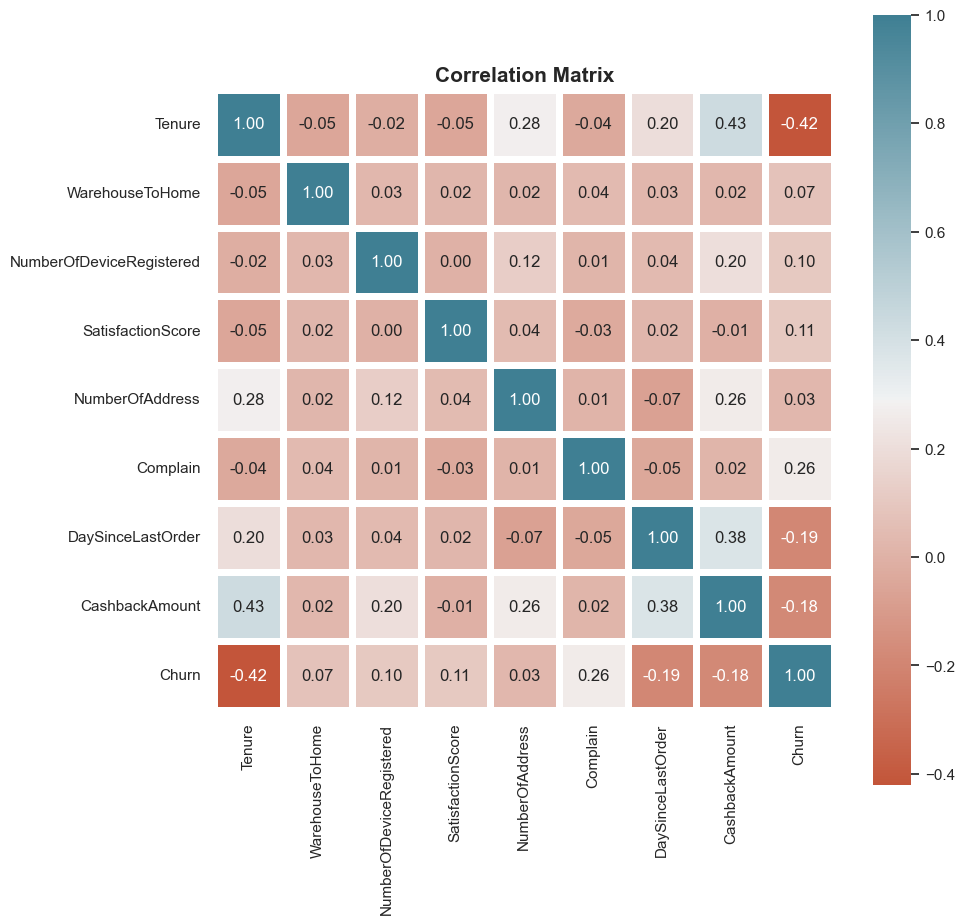

In [13]:
plt.figure(figsize = (10, 10))
palette = sns.diverging_palette(20, 220, n = 256)
corr = df_numeric.corr(method='spearman')
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = palette, square = True, linewidths = 5)
plt.title('Correlation Matrix', size = 15, weight = 'bold')

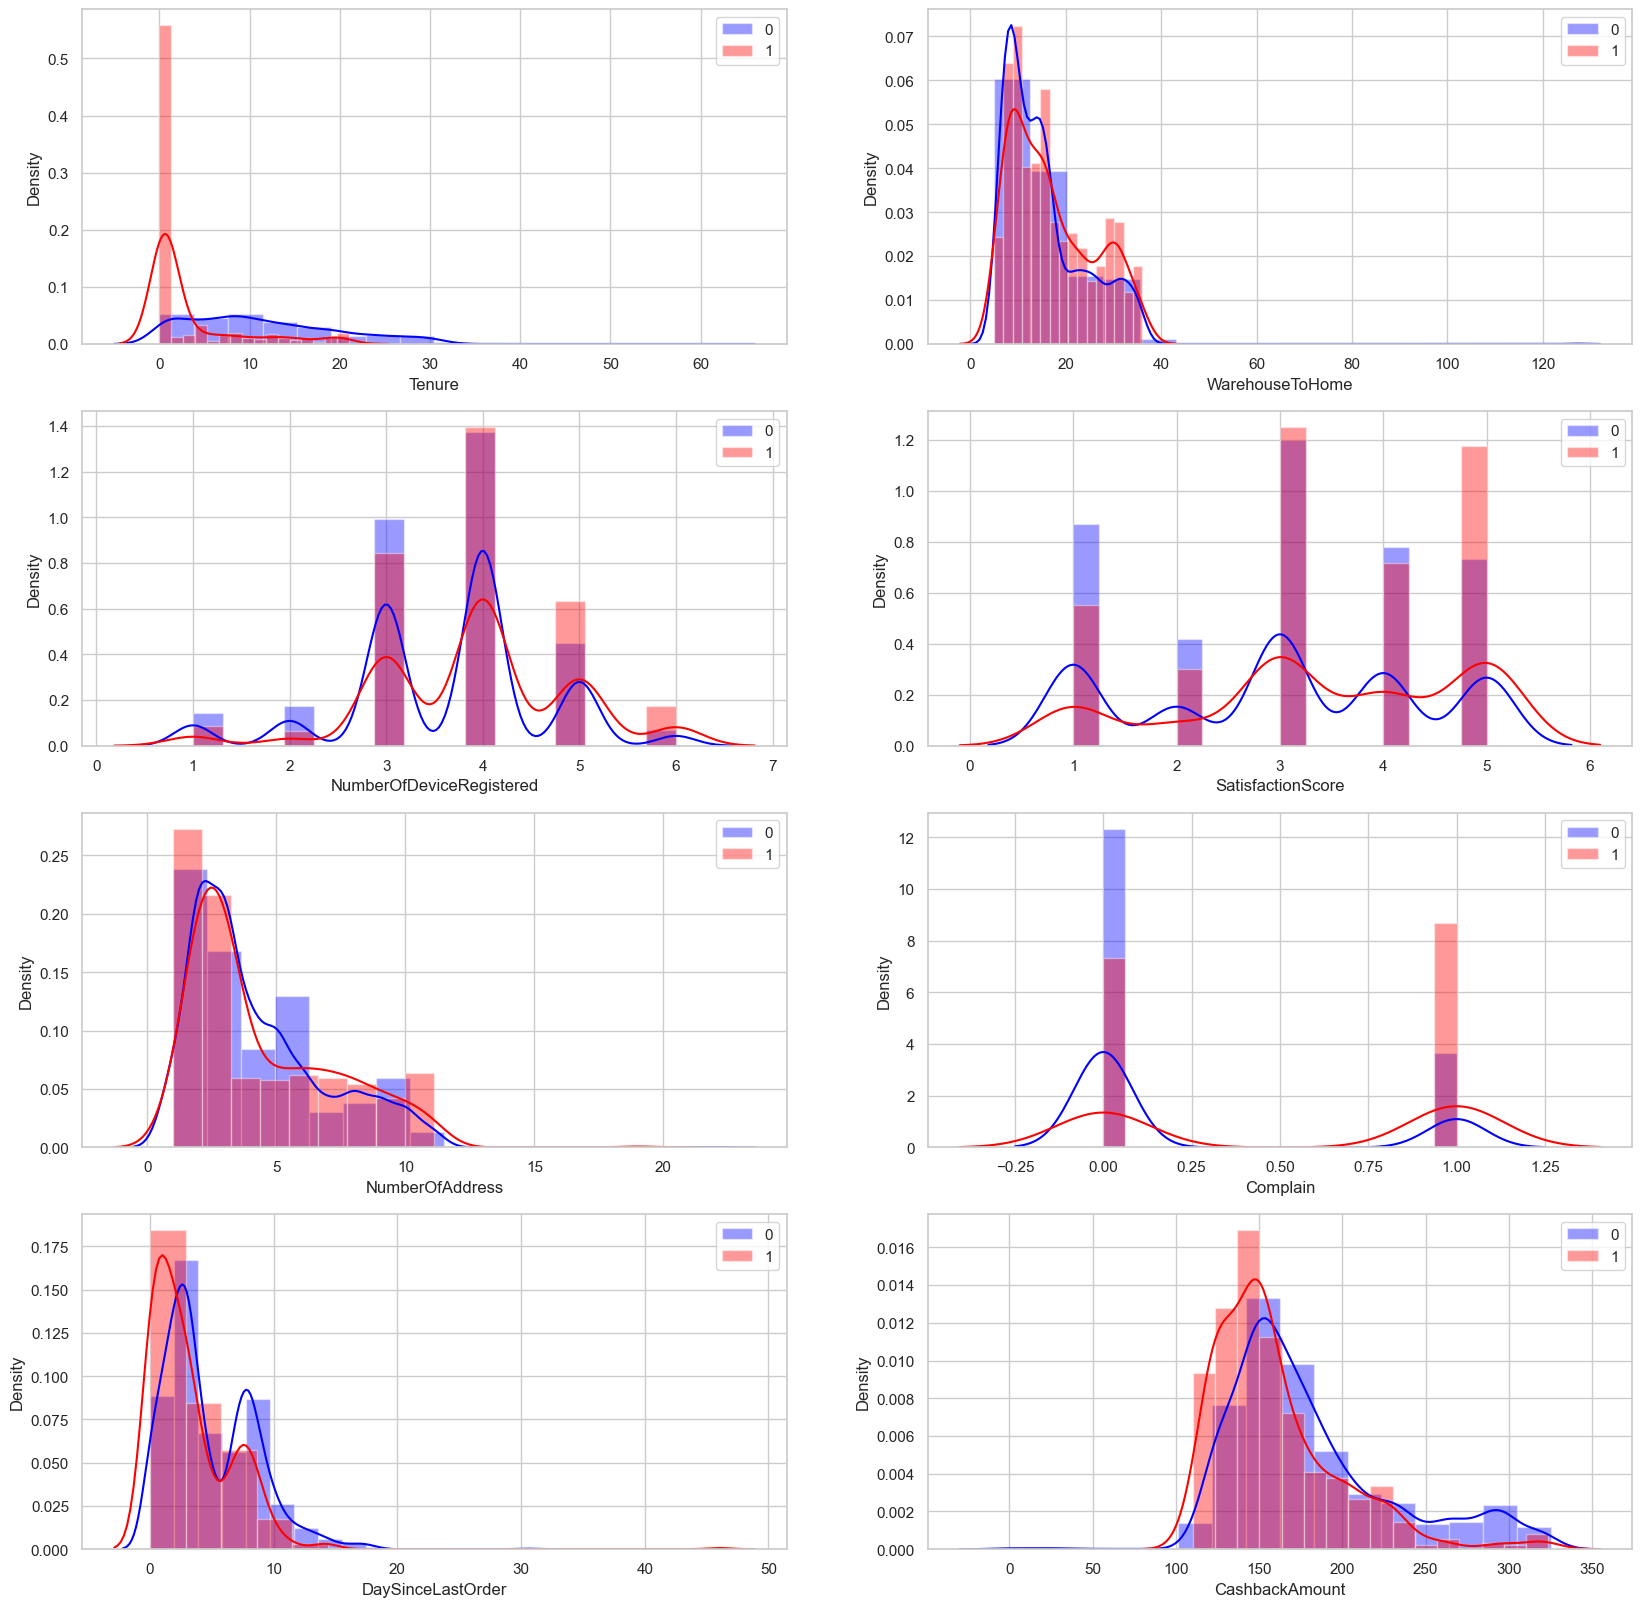

In [14]:
bins = 16
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.distplot(df_main[df_main['Churn']== 0]['Tenure'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['Tenure'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 2)
sns.distplot(df_main[df_main['Churn']== 0]['WarehouseToHome'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['WarehouseToHome'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 3)
sns.distplot(df_main[df_main['Churn']== 0]['NumberOfDeviceRegistered'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['NumberOfDeviceRegistered'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 4)
sns.distplot(df_main[df_main['Churn']== 0]['SatisfactionScore'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['SatisfactionScore'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 5)
sns.distplot(df_main[df_main['Churn']== 0]['NumberOfAddress'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['NumberOfAddress'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 6)
sns.distplot(df_main[df_main['Churn']== 0]['Complain'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['Complain'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 7)
sns.distplot(df_main[df_main['Churn']== 0]['DaySinceLastOrder'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['DaySinceLastOrder'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')
plt.subplot(4, 2, 8)
sns.distplot(df_main[df_main['Churn']== 0]['CashbackAmount'], bins = bins, color = 'blue', label = 0)
sns.distplot(df_main[df_main['Churn']== 1]['CashbackAmount'], bins = bins, color = 'red', label = 1)
plt.legend(loc = 'upper right')

In [15]:
df_vilf = df_main.copy()
df_vilf = df_vilf.dropna()

In [16]:
def calc_vilf(df_vilf):
    vif = pd.DataFrame()
    vif['variables'] = df_vilf.columns
    vif['VIF'] = [variance_inflation_factor(df_vilf.values, i) for i in range(df_vilf.shape [1])]
    
    return(vif)

In [17]:
calc_vilf(df_vilf[['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']])

,variables,VIF
0,Tenure,3.265371
1,WarehouseToHome,4.031538
2,NumberOfDeviceRegistered,10.132427
3,SatisfactionScore,5.232309
4,NumberOfAddress,3.922841
5,Complain,1.390543
6,DaySinceLastOrder,3.035880
7,CashbackAmount,16.127603


**Kesimpulan**
- Pada Histogram Plot data terdistribusi secara *Left Skewed*.
- Pada Histogram Plot data kolom `Tenure` terlihat ada tanggal 0, 40, 50, dan 60.
- Pada Data Frame masih terdapat banyak *outliers* dan paling banyak pada kolom `Churn`, tetapi karena `Churn` adalah kolom label maka yang terdeteksi sebagai outliers adalah `1` yaitu keterangan seseorang yang `Churn`
- Data terdistribusi tidak normal setelah melakukan pengecekan dengan **Normal Test**.
- Pada Heatmap `CashbackAmount` memiliki korelasi yang kuat dengan `Tenure` dan `DaySinceLastOrder`
- Customer paling banyak melakukan `Churn` pada 5 hari pertama.
- Pada kolom `DaySinceLastOrder` customer paling banyak `Churn` pada orderan pertama mereka atau awal pertama kali download app.
- Customer yang paling banyak melakukan `Churn` salah satunya justru yang mendapatkan cash back lebih dari 100$.
- Walaupun pada heatmap `CashbackAmount` memiliki korelasi yang kuat dengan `Tenure` dan `DaySinceLastOrder` tetapi setelah dilakukan pengecekan dengan multicollinearity justru `CashbackAmount` memiliki nilai VIF paling besar maka sebaiknya `CashbackAmount` kita drop kolomnya.
- Untuk kolon `NumberOfDeviceRegistered` karena VIF scorenya lebih dari 5 dan kolom ini hanya berisi jumlah device yang didaftarkan sebaiknya di drop juga kolomnya karena bisa sangat berpengaruh ke multicollinearitas.

## Kategorik

In [18]:
df_main.select_dtypes(include='object').nunique()

PreferedOrderCat    6
MaritalStatus       3
dtype: int64

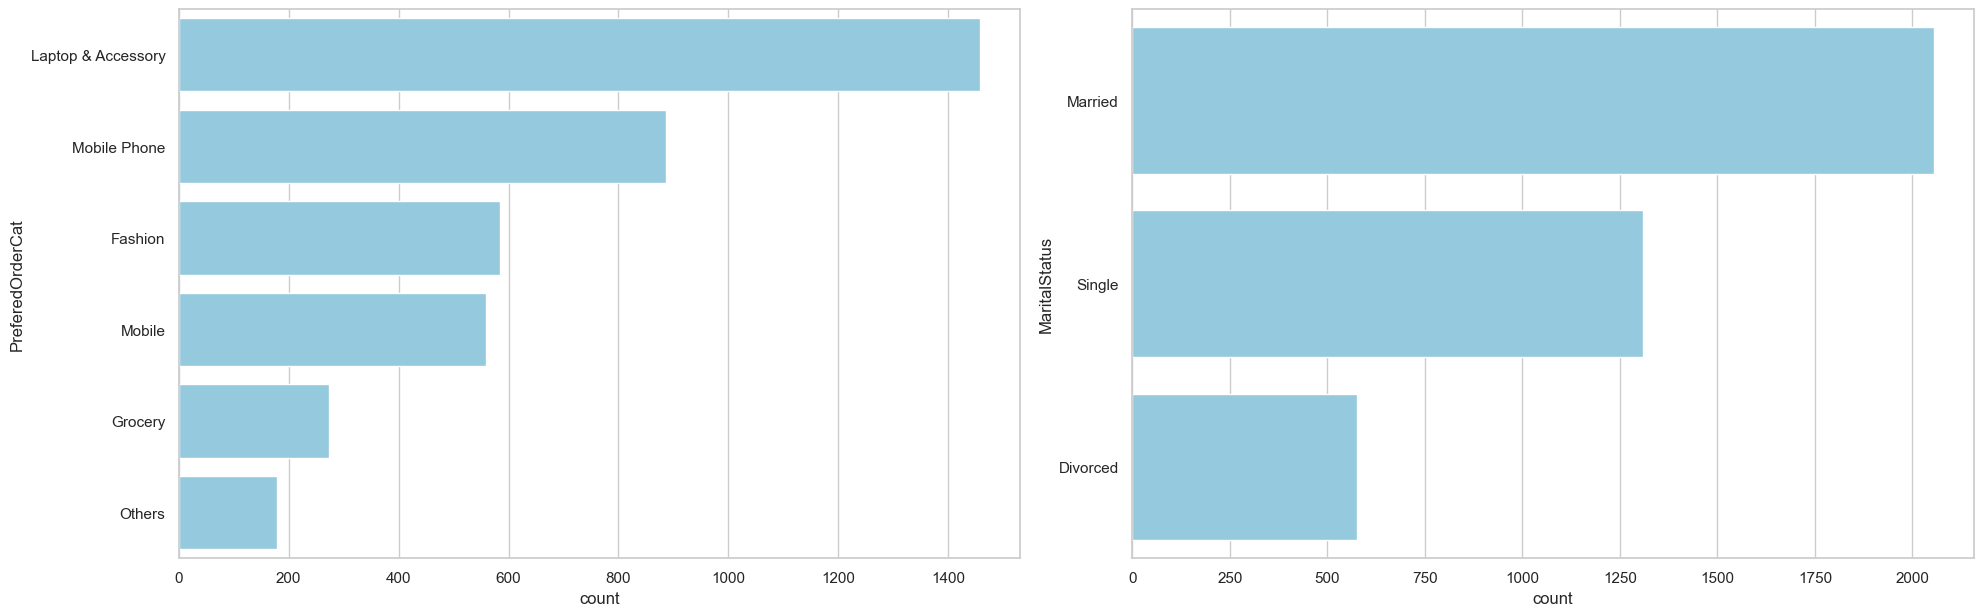

In [19]:
count = 0
fig = plt.figure(figsize=(20,12))
for kolom in df_main.select_dtypes(include='object').columns:
    count += 1
    plt.subplot(2,2,count)
    sns.countplot(y = kolom, data = df_main, order = df_main[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

**Kesimpulan**
- Untuk tipe data kategorik hanya ada 2 kolom yaitu `PreferedOrderCat` & `MaritalStatus`.
- Konsumen kebanyakan mengorder barang di E-commerce ini yaitu Laptop & Accessory dan yang kedua adalah Mobile Phone.
- Dan yang paling banyak mengorder adalah orang yang sudah menikah dengan count sampai 2000.

# Data Cleaning

In [20]:
df = df_main.copy()
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Handling Duplicate Data & Drop Column CashbackAmount

In [21]:
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  671


In [22]:
# Drop duplicate data
df.drop_duplicates(inplace=True)

# Cehck duplicate data
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


**Merge Mobile to Mobile Phone and Grocery to Others**

In [23]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone           725
Fashion                484
Mobile                 458
Grocery                241
Others                 149
Name: count, dtype: int64

In [24]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'

In [25]:
df.loc[df['PreferedOrderCat'] == 'Grocery', 'PreferedOrderCat'] = 'Others'

In [26]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Others                 390
Name: count, dtype: int64

In [27]:
df = df.drop(['CashbackAmount', 'NumberOfDeviceRegistered'], axis = 1)

**Kesimpulan**
- Menghapus nilai duplicate yang terdapat pada data frame
- Dalam kolom `PreferedOrderCat` yang berarti pelanggan memilih kategori belanja pada perusahaan, terdapat kesamaan makna antara *Mobile* dan *Mobile Phone* dimana hal tersebut dapat disatukan atau disamakan nilainya dengan *Mobile Phone*, dan begitu juga dengan *Grocery* dengan *Others*.
- Kolom `CashbackAmount` & `NumberOfDeviceRegistered` didrop karena memiliki nilai VIF yang besar dan kolom `CashbackAmount` tidak memiliki korelasi yang kuat dengan kolom *label*
- `NumberOfDeviceRegistered` di drop karena memiliki VIF score yang mencapai 10 lalu setelah di drop justru membuat true positive menjadi 11 point, dibandingkan tidak di drop hanya mendapatkan penambahan data sebesar 5 point saja.
- Untuk kategori value seperti *mobile* saya gabungkang valuenya dengan *mobile phone* karena memiliki kesamaan arti begitu juga dengan *grocery* dengan *Others*

## Handling NaN Value

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             3110 non-null   float64
 1   WarehouseToHome    3135 non-null   float64
 2   PreferedOrderCat   3270 non-null   object 
 3   SatisfactionScore  3270 non-null   int64  
 4   MaritalStatus      3270 non-null   object 
 5   NumberOfAddress    3270 non-null   int64  
 6   Complain           3270 non-null   int64  
 7   DaySinceLastOrder  3089 non-null   float64
 8   Churn              3270 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 255.5+ KB


<Axes: >

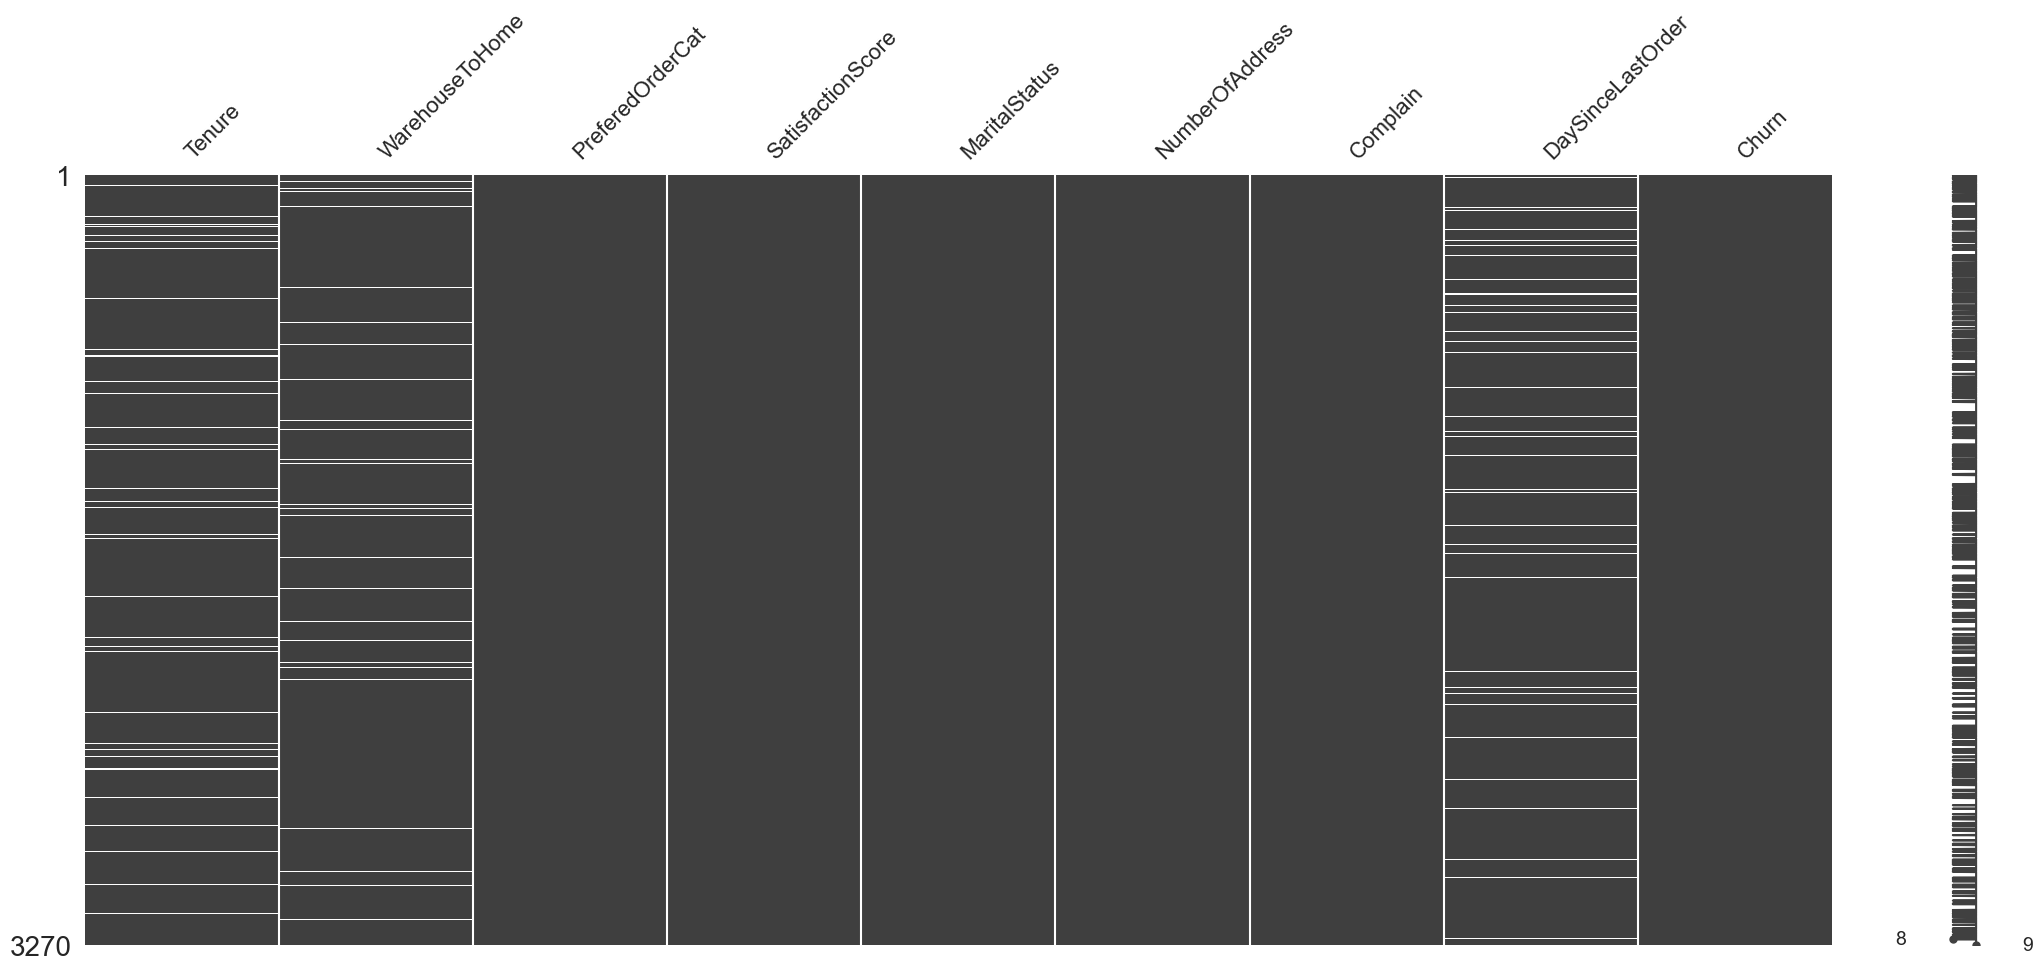

In [29]:
msno.matrix(df)

In [30]:
df.isna().sum()

Tenure               160
WarehouseToHome      135
PreferedOrderCat       0
SatisfactionScore      0
MaritalStatus          0
NumberOfAddress        0
Complain               0
DaySinceLastOrder    181
Churn                  0
dtype: int64

In [31]:
df.isna().sum()/len(df)*100

Tenure               4.892966
WarehouseToHome      4.128440
PreferedOrderCat     0.000000
SatisfactionScore    0.000000
MaritalStatus        0.000000
NumberOfAddress      0.000000
Complain             0.000000
DaySinceLastOrder    5.535168
Churn                0.000000
dtype: float64

In [32]:
df['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10., nan,  8.,
       19.,  0.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,
        2., 21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

**Keterangan Missing Value Tenure**

`Tenure` merupakan masa berlangganan dari pelanggan, Pelanggan baru sudah direpresentasikan dengan nilai 0, kemungkinan nilai *NaN* karena tidak terinput.

In [33]:
df['WarehouseToHome'].unique()

array([ 29.,  25.,  13.,  15.,  16.,  11.,  12.,   7.,  26.,  20.,  14.,
         8.,  21.,  22.,  27.,  18.,  33.,   9.,  17.,  nan,   6.,  31.,
        28.,  10.,  19.,  32.,  23.,  30.,  35.,  34.,  24.,   5.,  36.,
       127.])

**Keterangan Missing Value WareHouseToHome**

`WareHouseToHome` merupakan jarak gudang ke alamat pelanggan, kemungkinan nilai *NaN* karena tidak terinput.

In [34]:
df['DaySinceLastOrder'].unique()

array([ 7., nan,  8., 11.,  2.,  1.,  4.,  3.,  6.,  0., 14.,  9., 10.,
       12.,  5., 17., 30., 18., 16., 13., 15., 46., 31.])

**Keterangan Missing Value DaySinceLastOrder**

`DaySinceLastOrder` merupakan rentang hari sejak transaksi terakhir, nilai *NaN* bisa jadi karena pelanggan baru pertama kali baru melakukan transaksi. Untuk pengisian Nan value akan dilakukan saat modeling karena jika dilakukan duluan dihawatirkan akan menyebabkan data leakage.

# Supervised Learning

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PredictionErrorDisplay
import shap
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix, recall_score, classification_report

## Data Preparation/Preprocessing

In [36]:
transformer = ColumnTransformer([
    ('one hot encoder',OneHotEncoder(drop = 'first'),['MaritalStatus', 'PreferedOrderCat']),
    ('iterative', IterativeImputer(initial_strategy='mean', missing_values=np.nan),['DaySinceLastOrder','Tenure','WarehouseToHome'])
    ],remainder='passthrough')

In [37]:
random_state = 42
dt = DecisionTreeClassifier(random_state=random_state)
rf = RandomForestClassifier(random_state=random_state)
xgb = XGBClassifier(random_state=random_state)
lr = LogisticRegression(random_state=random_state)
knn = KNeighborsClassifier()
svm = SVC(random_state=random_state)

In [38]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify= y,
    test_size=0.2,
    random_state=random_state)

**Kesimpulan**
- Karena missing value/NaN value memiliki total sebesar 14.5% dari keseluruhan data frame maka saya memutuskan menggunakan imputer untuk mengisi NaN value, karena masih memiliki data original sebesar 85.5%.
- Untuk imputer saya memilih menggunakan `iterativeimputer` karena metode ini memanfaatkan variable lain untuk memprediksi missing value menggunakan regresi secara iteratif. `Iterativeimputer` dapat menghandle berbagai jenis tipe data dan hubungan antara feature, terutama apabila ada hubungan antara missing column dengan feature lain di data jadi dapat memberikan input yang lebih akurat.
- Untuk merubah kolom object menjadi numerik saya menggunakan `onehotencoder` karena total jumlah kolom object hanya ada 2 kolom maka `onehotencoder` masih cukup baik untuk mengatasinya.Dengan `onehotencoder` data dalam suatu fitur akan dikonversi dengan menambahkan kolom dengan jumlah kolom sesuai dengan jumlah variasi nilai data, selanjutnya akan diisikan nilai dengan angka 0 dan 1 sesuai dengan nilai pada datanya. `onehotencoder` juga lebih baik digunakan untuk data yang berisi sedikit variasi nilai pada datanya sehingga tidak menambah jumlah kolom terlalu banyak dalam data.

## Modeling

**Over Sampling**

In [39]:
ROS = RandomOverSampler()
models_name = ['Decision Tree', 'Random Forest', 'xgb']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [dt, rf, xgb]
mean_scores = []
std_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', ROS),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mean_scores.append(cv_rec.mean())
    std_scores.append(cv_rec.std())
    
result_df1 = pd.DataFrame({
    'Name': models_name,
    'Mean Score': mean_scores,
    'Standard Deviation': std_scores,
})
result_df1 = result_df1.sort_values(by='Standard Deviation', ascending=False)

result_df1

,Name,Mean Score,Standard Deviation
2,xgb,0.714145,0.067392
1,Random Forest,0.690725,0.062764
0,Decision Tree,0.636963,0.035976


In [40]:
ROS = RandomOverSampler()
robust = RobustScaler()
models_name = ['Logreg', 'KNN', 'SVM']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [lr, knn, svm]
mean_scores = []
std_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', ROS),
        ('scaling', robust),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mean_scores.append(cv_rec.mean())
    std_scores.append(cv_rec.std())
    
result_df2 = pd.DataFrame({
    'Name': models_name,
    'Mean Score': mean_scores,
    'Standard Deviation': std_scores,
})
result_df2 = result_df2.sort_values(by='Standard Deviation', ascending=False)

result_df2

,Name,Mean Score,Standard Deviation
0,Logreg,0.796334,0.048843
1,KNN,0.798523,0.045051
2,SVM,0.821943,0.043664


**Under Sampling**

In [41]:
RUS = NearMiss(version=3)
models_name = ['Decision Tree', 'Random Forest', 'xgb']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [dt, rf, xgb]
mean_scores = []
std_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', RUS),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mean_scores.append(cv_rec.mean())
    std_scores.append(cv_rec.std())
    
result_df3 = pd.DataFrame({
    'Name': models_name,
    'Mean Score': mean_scores,
    'Standard Deviation': std_scores,
})
result_df3 = result_df3.sort_values(by='Standard Deviation', ascending=False)

result_df3

,Name,Mean Score,Standard Deviation
2,xgb,0.861806,0.051563
1,Random Forest,0.852394,0.049703
0,Decision Tree,0.796279,0.041678


In [42]:
RUS = NearMiss(version = 3)
robust = RobustScaler()
models_name = ['Logreg', 'KNN', 'SVM']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [lr, knn, svm]
mean_scores = []
std_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', RUS),
        ('scaling', robust),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    mean_scores.append(cv_rec.mean())
    std_scores.append(cv_rec.std())
    
result_df4 = pd.DataFrame({
    'Name': models_name,
    'Mean Score': mean_scores,
    'Standard Deviation': std_scores,
})
result_df4 = result_df4.sort_values(by='Standard Deviation', ascending=False)

result_df4

,Name,Mean Score,Standard Deviation
2,SVM,0.761122,0.039585
1,KNN,0.772804,0.037781
0,Logreg,0.761231,0.034307


**Model Terbaik dengan Undersampling**

In [43]:
RUS = NearMiss(version=3)
models_name = [ 'Decision Tree']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [dt]
recall_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', RUS),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    
result_df3 = pd.DataFrame({
    'Name': models_name,
    'Recall Score': recall_scores,
})
result_df3 

,Name,Recall Score
0,Decision Tree,0.82243


In [44]:
RUS = NearMiss(version=3)
robust = RobustScaler()
models_name = ['logreg']
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

models = [lr]
recall_scores = []

for model in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('balancing', RUS),
        ('scaling', robust),
        ('modelling', model)
    ])
    
    cv_rec = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = skfold,
        scoring = 'recall'
    )
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    
result_df4 = pd.DataFrame({
    'Name': models_name,
    'Recal Score': recall_scores,
})
result_df4

,Name,Recal Score
0,logreg,0.850467


**Kesimpulan**
- Untuk scalling saya menggunakan `robustscaller` karena dapat menghandle outliers atau 'robust' terhadap outliers dengan cara kerja scaling dengan menghilangkan median dan lalu membaginya dengan (IQR), hal ini yang membuat `robustscaller` tahan terhadap pengaruh outliers, tetapi tidak semua model dilakukan *scaling* karena untuk model tree base tidak perlu dilakukan *scaling*.
- Untuk balancing saya memilih menggunakan `undersampling` tetapi karena hasil True positive setelah tuning tidak memuaskan dikarenakan hasil True Positive setelah tuning justru berkurang dan jika ada peningkatan hanya meningkat 1 data saja, maka saya mencoba dengan tehnik `Nearmiss` karena hasil pada model konsistensinya lebih baik jika menggunakan `Nearmiss` walaupun akurasinya tidak terlalu tinggi tetapi menurut saya cukup. Untuk `Nearmiss` saya memilih versi 3 dengan cara kerja memilih contoh dari data mayoritas yang jaraknya dekat dan jauh dari data minoritas, lalu mengurangi data mayoritas sehingga jumlahnya sama dengan data minoritas. karena pada saat bencmarking model hasil akurasi dan konsistensi lebih baik dibandingkan versi 1 dan 2 maka saya memilih versi 3, dan dengan versi 3 ini saya mendapatkan peningkatan pada True positive setelah tuning. Walaupun menggunakan tehnik balancing `undersampling` dapat mengurangi informasi dari data karena ada pengurangan data mayoritas.
- Untuk metrix scoring saya memilih menggunakan `recall` karena `recall(sensitivity or true positive rate)` meminimalisir false negative (FN) atau test model salah memprediksi hasil positif dan ternyata hasilnya negatif. Dan saya memilih `recall` karena saya ingin model dapat mengidentifikasikan sebanyak mungkin true positif (TP), karena menurut saya hal itu penting untuk memprediksi sebanyak mungkin 'churner' yang sebenarnya. `Recall` memiliki cara kerja sebagai berikut :

    *1. TP (True Positive)*

    Model dapat memprediksi positive (*Churn*) yang sebenarnya.

    *2. FN (False Negative)*

    Model banyak berhasil memprediksi yang akan (*Churn*), tetapi banyak gagal memprediksi yang sebenarnya (*Not Churn*).

    `Recall` memberikan insight kepada model untuk mengidentifikasi kelas potive dengan benar. nilai recall yang tinggi menandakan model dapat memprediksi kelas positive sebanyak-banyaknya dengan meminimalisir nilai FN (*False Negative*). Dengan rumus :

    Recall = True Positives / (True Positives + False Negatives)

- Untuk algoritma saya memilih menggunakan `Logistic Regression` karena memiliki nilai konsistensi yang terbaik dibandingkan dengan model yang lain yaitu sebesar 0.034 walaupun hasil akurasinya kurang baik yaitu sebesar 76% tetapi perbedaannya tidak terlalu signifikan, Untuk model `Logistic Regression` memiliki beberapa step untuk cara kerjanya, yaitu :

    *1. Linear Combination of Features*
    
     sekumpulan Fitur/vector (X), `Logistic Regression` dimulai dengan menghitung kombinasi linear dari fitur-fitur, yang diboboti oleh parameter (koefisien). Hal ini disebut 'Prediktor Linier' atau 'Logit', dengan rumus :
     
     Prediktor Linier (logit) = β0 + β1 * x1 + β2 * x2 + ... + βn * xn

    *2. Logistic Function (Sigmoid)*

    Untuk merubah linear predictor menjadi probability value, `Logistic Regression` menggunakan logistic function atau sigmoid function, ini adalah elemen kunci pada `Logistic Regression`. Dengan cara merubah linear predictor menjadi p-value antara 0 dan 1. Sigmoid function S-shaped curve yang memetakan angka sesungguhnya menjadi probabilitas, dengan rumus :

    Probability of belonging to class 1 (P(Y=1|x)) = 1 / (1 + e^(-linear predictor))

    sigmoid function adalah yang bertanggung jawab kepada kemampuan model `Logistic Regression` untuk menghasilkan nilai probabilitas.

    *3.Thresholding*
    
    Setelah mendapatkan nilai probabilitas dari sigmoid function, Suatu ambang batas (0.5) diterapkan. Jika probabilitasnya yang diestimasi lebih besar atau sama dengan ambang batas, input diklasifikasikan sebagai milik kelas 1 dan sebaliknya, diklasifikasikan sebagai milik kelas 0.

    *4. Training*

    Dalam tahap training, `Logistic Regression` mempelajari coeffisient (β0, β1, β2, ...) dengan meminimalisir cost function. Metode cost function yang paling sering digunakan adalah logistic loss atau cross-entropy loss. Proses ini melibatkan iterative optimazation tehnik sepert gradient descent.

    *5. Interpretability*

    Salah satu keuntungan menggunakan model `Logistic Regression` adalah kemampuannya untuk diinterpretasikan. Koefisien yang dipelajari dapat diinterpretasikan sebagai dampak setiap fitur terhadap probabilitas input menjadi milik kelas 1. Koefisien positif menunjukan asosiasi positif dengan kelas 1, sementara koefisien negatif menunjukkan asosiasi negatif.

    *6. Regularization*

    `Logistic Regression` dapat diatur dengan menambahkan regulasi untuk mencegah overfitting. Regulasi L1 (Lasso) dan L2 (Ridge) dapat ditambahkan ke fungsi untuk memperkecil nilai koefisien menuju 0.

    *7. Evaluation*

    Setelah training, `Logistic Regression` dapat dievaluasi pada data test menggunakan berbagai macam metrics seperti accuracy, precision, recall, F1-Score, ROC-AUC dan sebagainya, tergantung dari spesific permasalahannya.

## Hyperparameter Tuning

In [45]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

hyperparam_space_logreg = {
    'model__C' : C,
    'model__penalty' : penalty,
    'model__solver' : solver
}

In [46]:
lr = LogisticRegression(random_state=random_state)

estimator_log = Pipeline ([
    ('preprocessing', transformer),
    ('Scalling', robust),
    ('balancing', RUS),
    ('model', lr),
    ])

crossval = StratifiedKFold(n_splits=5, shuffle = True, random_state=random_state)

param_log = GridSearchCV(
    estimator_log, 
    param_grid = hyperparam_space_logreg,
    cv = crossval,
    scoring = 'recall', 
    n_jobs = -1, 
    verbose = 1
    )

In [47]:
param_log.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus',
                                                                          'PreferedOrderCat']),
                                                                        ('iterative',
                                                                         IterativeImputer(),
                                                                         ['DaySinceLastOrder',
                                                                          'Tenure',
                                                                          'WarehouseToHome'])])),
                                       ('Scalling', RobustScaler()),
                                       ('balancing', NearMiss(version=3)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                           'sag', 'saga']},
             scoring='recall', verbose=1)

In [48]:
print('Logistic Regression')
print('Best_score:', param_log.best_score_)
print('Best_params:', param_log.best_params_)

Logistic Regression
Best_score: 0.8478248974008208
Best_params: {'model__C': 0.001, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [49]:
pd.DataFrame(param_log.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_model__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.052497,0.008305,0.008028,0.000783,0.001,l2,liblinear,"{'model__C': 0.001, 'model__penalty': 'l2', 'm...",0.837209,0.894118,0.835294,0.835294,0.837209,0.847825,0.023162,1
20,0.041640,0.002133,0.008245,0.002020,0.1,l1,liblinear,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.802326,0.823529,0.694118,0.776471,0.709302,0.761149,0.050996,2
25,0.054076,0.018679,0.013154,0.006954,0.1,l2,liblinear,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.755814,0.811765,0.705882,0.764706,0.709302,0.749494,0.039157,3
15,0.046364,0.002976,0.009836,0.003942,0.01,l2,liblinear,"{'model__C': 0.01, 'model__penalty': 'l2', 'mo...",0.732558,0.776471,0.717647,0.776471,0.744186,0.749466,0.023600,4
24,0.049341,0.001855,0.008752,0.001406,0.1,l1,saga,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.802326,0.800000,0.705882,0.752941,0.686047,0.749439,0.047500,5
35,0.042681,0.003495,0.007831,0.000982,1,l2,liblinear,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.767442,0.800000,0.705882,0.752941,0.697674,0.744788,0.038370,6
40,0.041677,0.002690,0.006928,0.000490,10,l1,liblinear,"{'model__C': 10, 'model__penalty': 'l1', 'mode...",0.767442,0.800000,0.705882,0.741176,0.697674,0.742435,0.038158,7
30,0.049316,0.005937,0.008190,0.001141,1,l1,liblinear,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.767442,0.811765,0.694118,0.741176,0.697674,0.742435,0.044208,7
36,0.049294,0.002557,0.009268,0.002067,1,l2,newton-cg,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.767442,0.788235,0.705882,0.752941,0.697674,0.742435,0.035137,7
37,0.051931,0.003223,0.009133,0.001992,1,l2,lbfgs,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.767442,0.788235,0.705882,0.752941,0.697674,0.742435,0.035137,7


**Before Tuning**

In [50]:
BFRT_PIPE = Pipeline(steps=[('preprocessing', transformer),('Scalling', robust),('balancing', RUS),('model', lr)])
BFRT_PIPE.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat']),
                                                 ('iterative',
                                                  IterativeImputer(),
                                                  ['DaySinceLastOrder',
                                                   'Tenure',
                                                   'WarehouseToHome'])])),
                ('Scalling', RobustScaler()),
                ('balancing', NearMiss(version=3)),
                ('model', LogisticRegression(random_state=42))])

In [51]:
y_pred = BFRT_PIPE.predict(X_test)
cmb = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',cmb)
print('Classification Report: \n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[436 111]
 [ 22  85]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       547
           1       0.43      0.79      0.56       107

    accuracy                           0.80       654
   macro avg       0.69      0.80      0.71       654
weighted avg       0.87      0.80      0.82       654



<Axes: >

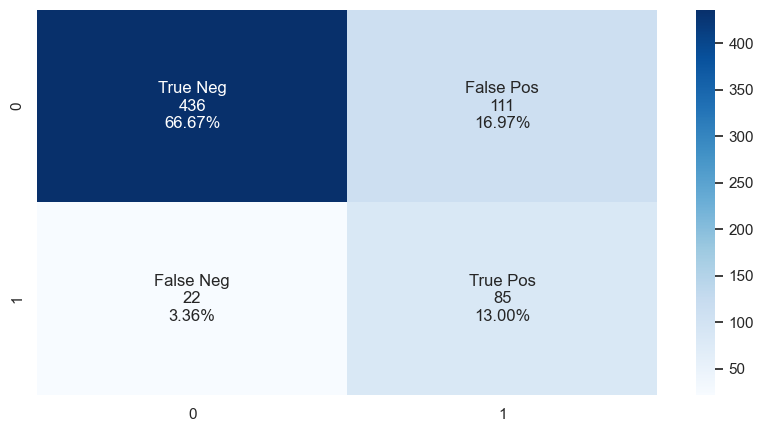

In [52]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')

**After Tuning**

In [53]:
best_model = param_log.best_estimator_
y_pred = best_model.predict(X_test)
cma = confusion_matrix(y_test, y_pred)
print('Confusin Matrix: \n', cma)
print('Classification Report: \n', classification_report(y_test, y_pred))

Confusin Matrix: 
 [[301 246]
 [ 11  96]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.55      0.70       547
           1       0.28      0.90      0.43       107

    accuracy                           0.61       654
   macro avg       0.62      0.72      0.56       654
weighted avg       0.85      0.61      0.66       654



<Axes: >

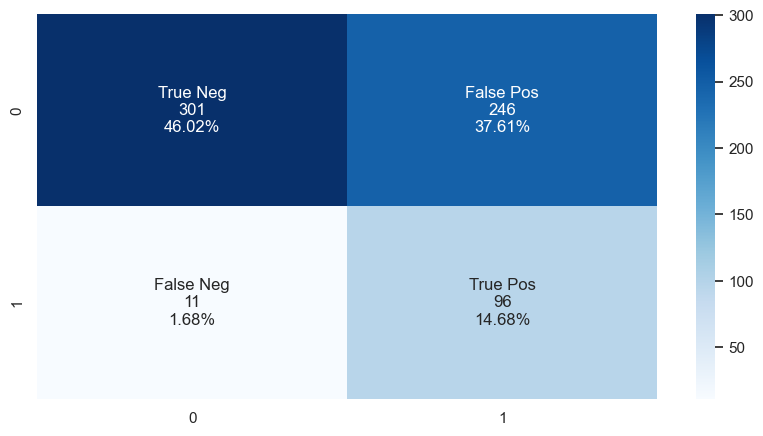

In [54]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cma.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cma.flatten()/np.sum(cma)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cma, annot=labels, fmt='', cmap='Blues')

**Kesimpulan**

- Adanya peningkatan True Positif setelah model di tuning sebesar 1.68%.
- Dan adanya penurunan False Negative setelah model di tuning sebesar 1.68%.
- Keterangan Confusion Matrix :

    *1. True Positive (TP)*

    Model berhasil memprediksi kelas positif (*Churn*).

    *2. True Negative (TN)*

    Model berhasil memprediksi kelas negative (*Not Churn*).

    *3. False Poisitve (FP)*

    Model berhasil prediksi (*Not Churn*), tetapi gagal memprediksi yang akan (*Churn*).

    *4. False Negative (FN)*

    Model berhasil prediksi yang akan (*Churn*), tetapi gagal memprediksi (*Not Churn*).



## Feature Importance Using SHAP

In [55]:
model = Pipeline([('preprocessing', transformer),('balancing', RUS),('scalling', robust),('model', LogisticRegression(random_state = random_state))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat']),
                                                 ('iterative',
                                                  IterativeImputer(),
                                                  ['DaySinceLastOrder',
                                                   'Tenure',
                                                   'WarehouseToHome'])])),
                ('balancing', NearMiss(version=3)),
                ('scalling', RobustScaler()),
                ('model', LogisticRegression(random_state=42))])

In [56]:
X_train_transformed = model.named_steps['preprocessing'].transform(X_train)
all_var_name = list(transformer.transformers_[0][1].get_feature_names_out()) + ['DaySinceLastOrder','Tenure','WarehouseToHome','SatisfactionScore','NumberOfAddress','Complain']
X_train_transformed = pd.DataFrame(X_train_transformed, columns=all_var_name)

In [57]:
X_test_transformed = model.named_steps['preprocessing'].transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=all_var_name)

In [58]:
shap_model = model.named_steps['model']
explainer = shap.LinearExplainer(shap_model, X_train_transformed)
shap_values = explainer.shap_values(X_test_transformed)

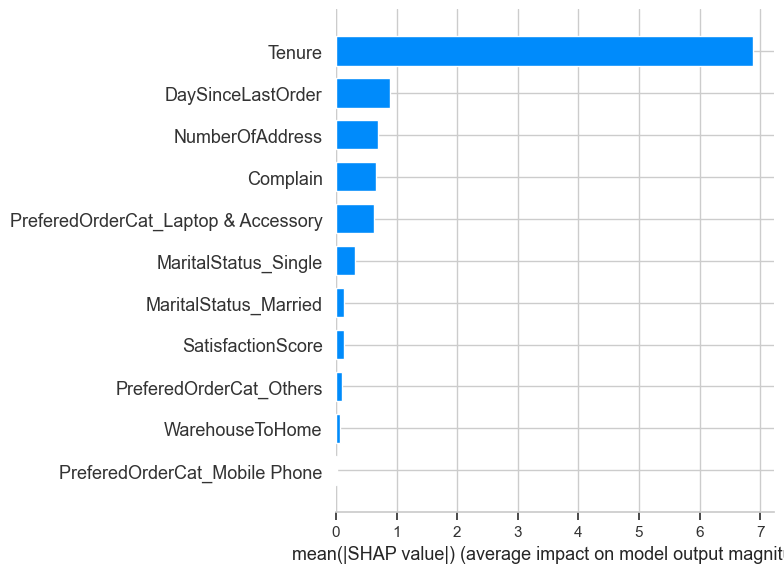

In [59]:
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")

**Kesimpulan**

Ada beberapa feature yang berpengaruh terhadap model yaitu :

- Tenure
- Complain
- PreferedOrdercattegory
- Number of address
- Marital status
- satisfaction score

# Top Feature Insight

In [60]:
df1 = df_main.copy()
df1

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [61]:
df1.loc[df1['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'

In [62]:
df1['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

### 1. Tenure

<Axes: xlabel='Tenure', ylabel='Density'>

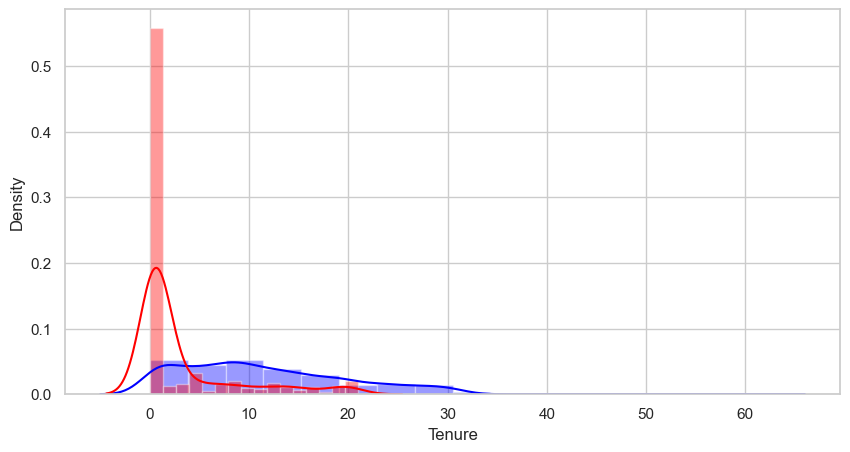

In [63]:
plt.figure(figsize=(10, 5))
sns.distplot(df1[df1['Churn']== 0]['Tenure'], bins = bins, color = 'blue', label = 0)
sns.distplot(df1[df1['Churn']== 1]['Tenure'], bins = bins, color = 'red', label = 1)

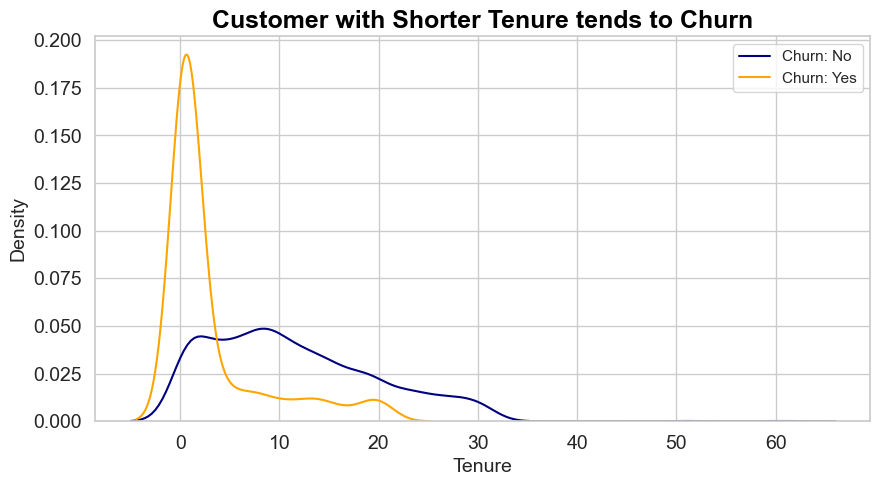

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df1[df1['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df1[df1['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Tenure', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right',ncol=1)


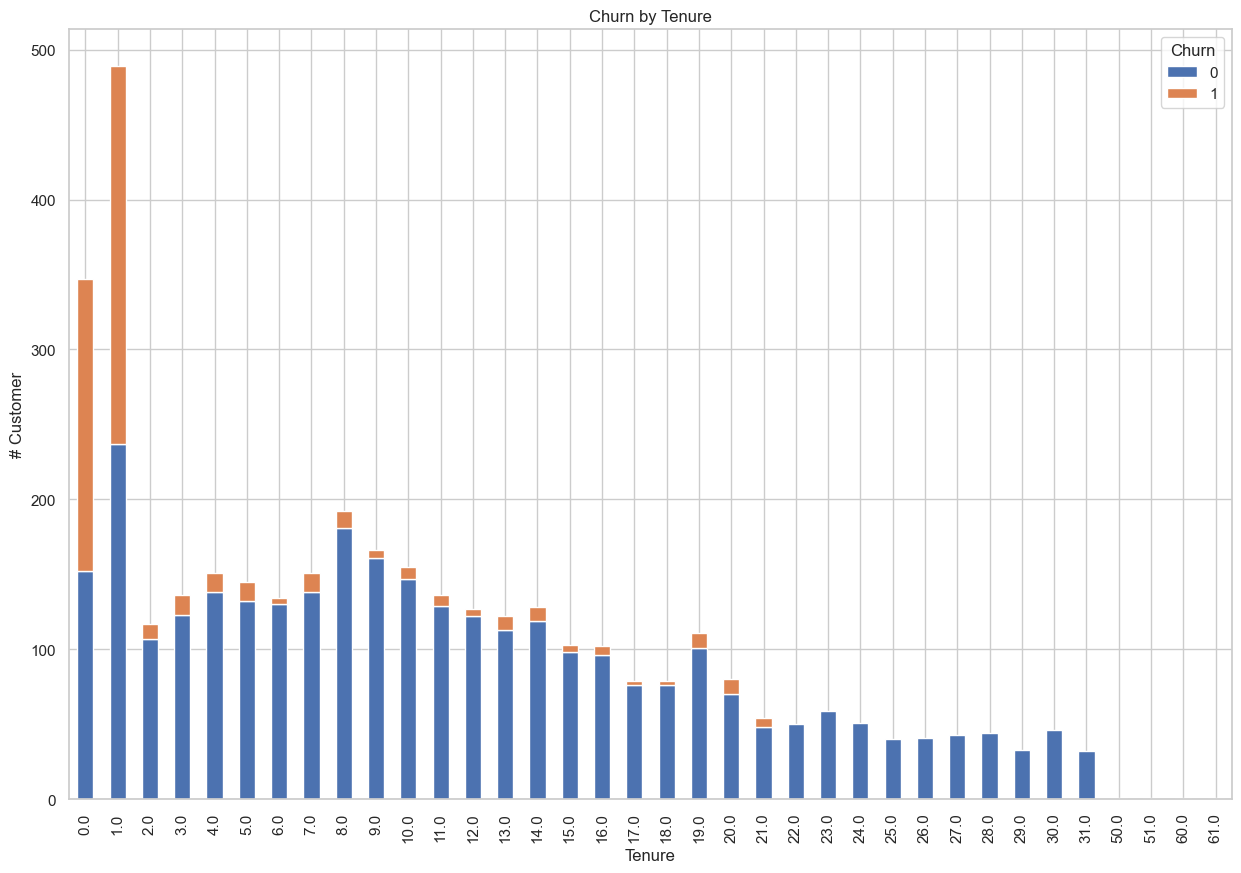

In [65]:
cust_day = pd.crosstab(df1["Tenure"], df1["Churn"])
cust_day.plot(kind = 'bar', stacked = True, title = "Churn by Tenure", figsize=(15, 10))
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

**Insight:**

Customer dengan `Tenure` rendah dibawah 23 hari memiliki potensi *Churn* yang besar dibandingkan customer menengah ke atas.

**Business Recommendation:**

Memberikan promo untuk customer dibawah 30 hari. Bisa berupa voucher discount atau free ongkir dan juga sediakan customer service yang selalu standby untuk menghandle complain dari customer 

### 2. Day Since Last Order

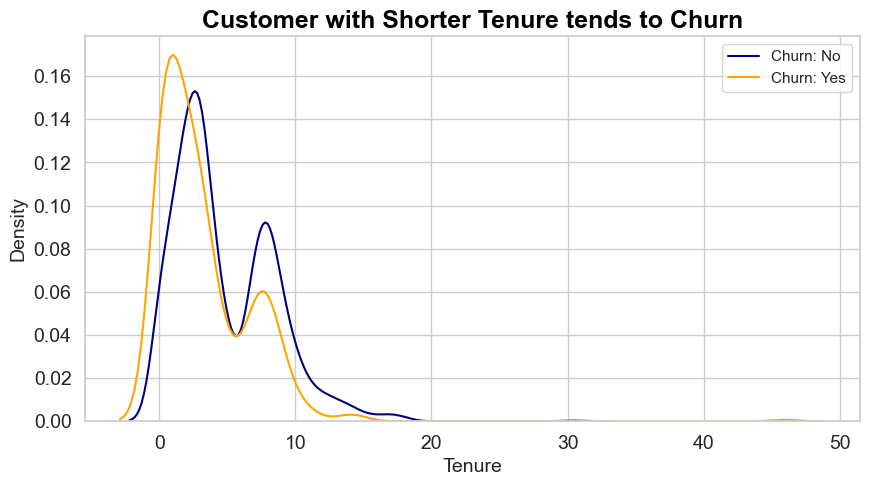

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df1[df1['Churn'] == 0]['DaySinceLastOrder'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df1[df1['Churn'] == 1]['DaySinceLastOrder'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Tenure', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper right',ncol=1)


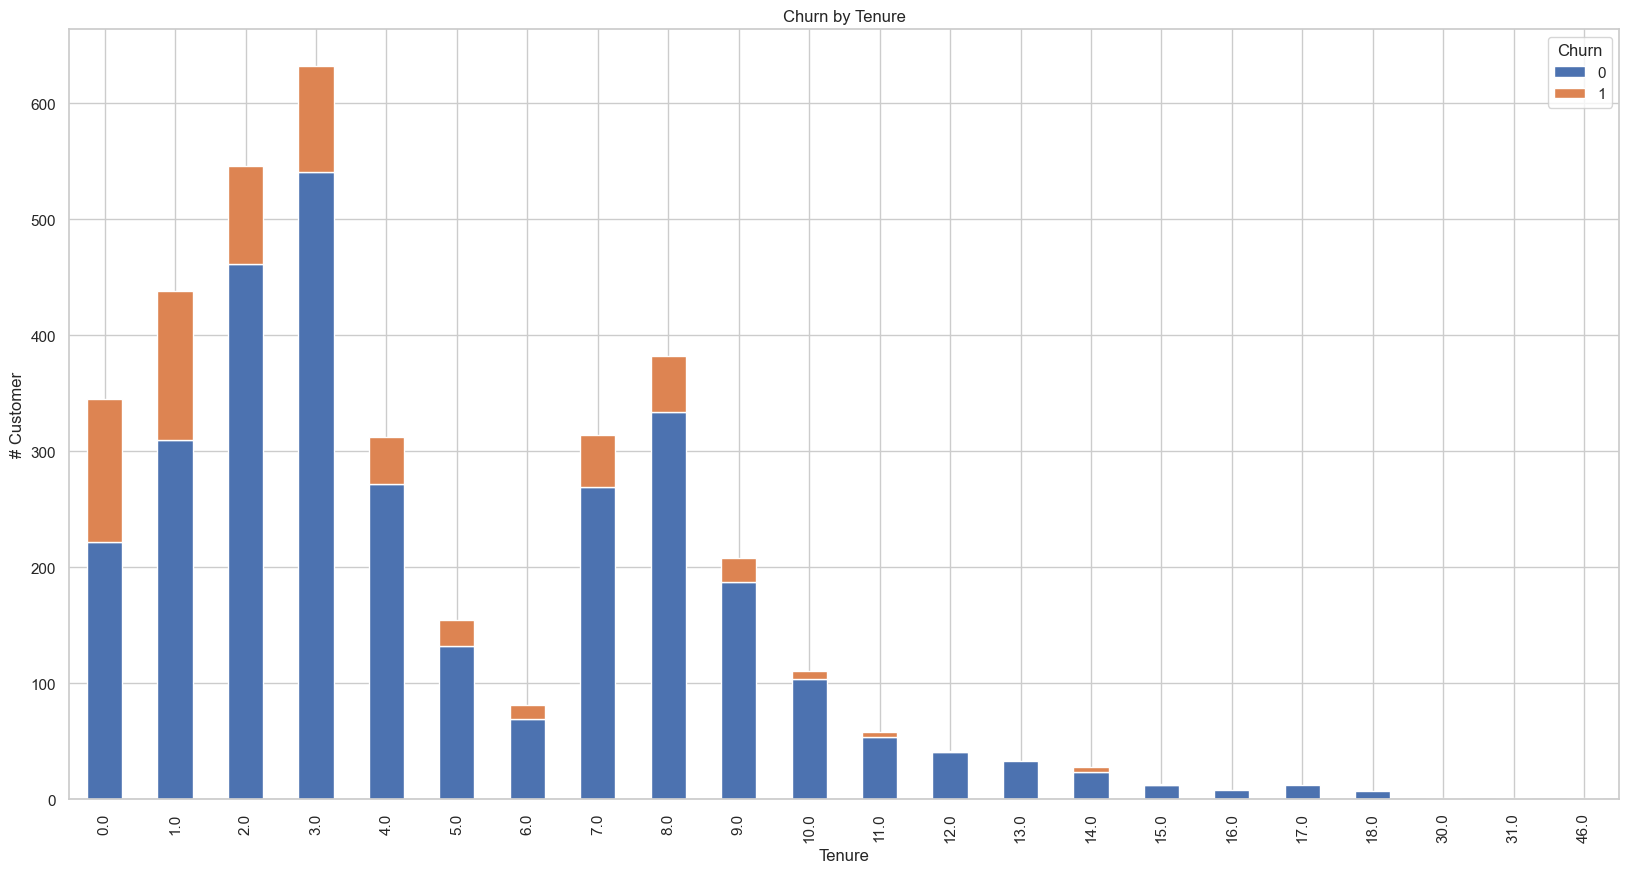

In [75]:
cust_day = pd.crosstab(df1["DaySinceLastOrder"], df1["Churn"])
cust_day.plot(kind = 'bar', stacked = True, title = "Churn by Tenure", figsize=(20, 10))
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

**Insight:**

Kebanyakan customer yang melakukan *churn* adalah yang mengorder barang di 10 hari terakhir.

**Business Recommendation:**

Setelah customer mengorder barang sebaiknya untuk mencoba reachout kembali customer dan menanyakan pendapat mereka tentang pelayanan dan juga memberikan mereka voucher discount untuk pembelanjaan berikutnya. 

### 3. Complain & Prefered Order Cat

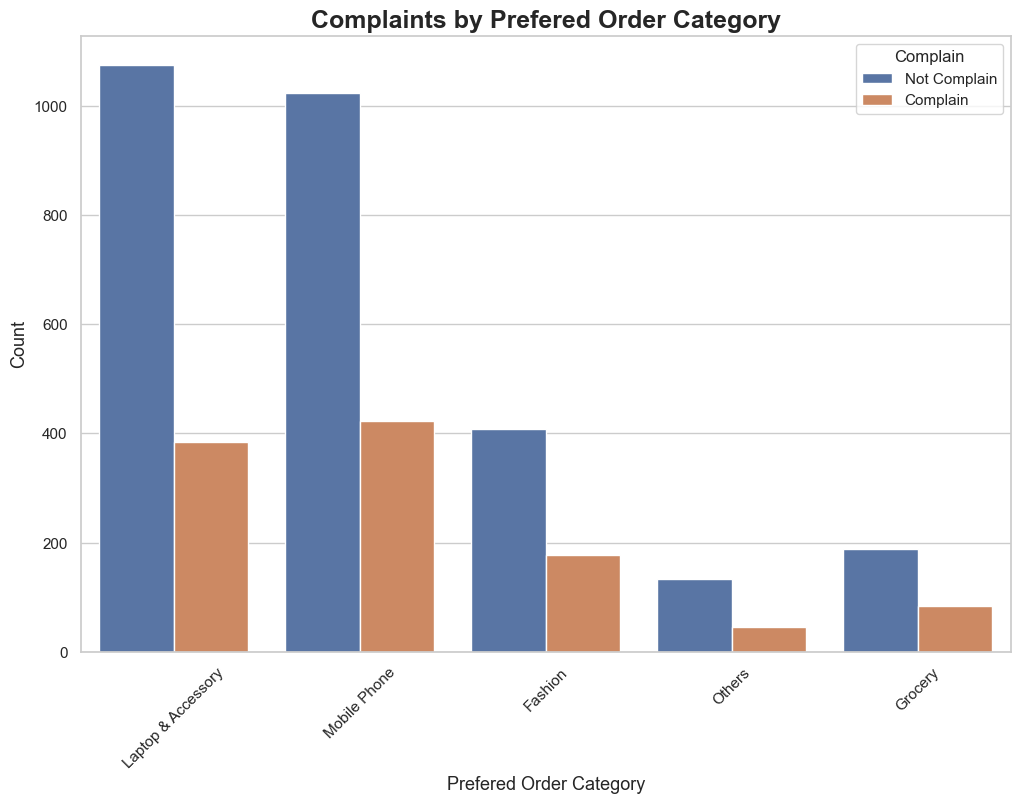

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df1, x='PreferedOrderCat', hue='Complain')
plt.title('Complaints by Prefered Order Category', fontsize=18, fontweight='bold')
plt.xlabel('Prefered Order Category', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(title='Complain', loc='upper right', labels=['Not Complain', 'Complain'])
plt.xticks(rotation=45)
plt.show()

In [67]:
summary_df = df1.groupby(['Churn', 'Complain']).agg({'Complain': ['count']}).reset_index()
summary_df.columns = ['Churn', 'Complain', 'Complain_Count']
summary_df['Complain'] = summary_df['Complain'].map({0: 'Not Complain', 1: 'Complain'})

print(summary_df)

   Churn      Complain  Complain_Count
0      0  Not Complain            2519
1      0      Complain             748
2      1  Not Complain             309
3      1      Complain             365


**Insight:**

Presentase customer *churn* akibat complain ternyata sebesar 54.20%, hampir 3 kali lipat presentase customer *churn* akibat tidak complain 22.85%. Untuk barang yang paling banyak kena complain adalah barang elektronik seperti hp dan laptop.

**Business Recommendation:**

Mengutamakan customer satisfaction dengan selalu menyediakan customer service 24 jam dan menyediakan asuransi untuk barang elektronik dan barang yang harganya lebih dari 1 juta saat melakukan pengiriman dengan asumsi penyebab customer complain adalah sering terjadi kerusakan akibat pengiriman dan membagi 2 tipe customer yaitu priority customer (customer yang ada kemungkinan *churn* dan complain) dan regular customer. 

# Conclusion

 Cost Benefit Calculation :

Pihak perusahaan memiliki biaya untuk mempertahankan customer sebesar Rp 10.000.000 per 100 customer itu sudah termasuk dengan biaya customer support, marketing dan upaya keterlibatan berkelanjutan, dan perusahaan memiliki pengeluaran akibat customer *churn* yaitu sebesar Rp 100.000.000 per 100 customer, dan itu belum termasuk kehilangan revenue akibat kehilangan customer dan biaya untuk mendapatkan customer baru seperti pembuatan iklan. Dengan perhitungan cost benefit perusahaan dapat mengkalkulasi seberapa banyak profit yang didapat dengan menggunakan model ini yaitu:

c_fp = Rp 100.000 * fp

c_fn = Rp 1.000.000 * fn

b_tp = Rp 1.000.000 * tp

Dengan Rumus :

CB = B - C

B = Benefit (b_tp)

C = Cost (c_fp + c_fn)

c_fp = Rp 24.000.000
    
c_fn = Rp 11.000.000

b_tp = Rp 96.000.000

B = Rp 96.000.000

C = Rp 35.000.000

CB = Rp 61.000.000

Walaupun model memprediksi TP masih kurang baik tetapi perusahaan tetap di untungkan karena perusahaan tetap mendapatkan benefit sebesar Rp 61.000.000 dengan cara mencegah customer untuk *Churn*. Tetapi masih ada pengeluaran yang lain yaitu biaya marketing yang kurang tepat sasaran yaitu customer yang tidak *Churn* diberikan banyak promo, dengan biaya marketing sebesar Rp 11.000.000 nilai ini didapat dari nilai c_fn dan ada juga biaya kehilangan customer *churn* karena model gagal memprediksi terlebih dahulu dan akhirnya tidak di approach oleh pihak perusahaan, dan hal ini membuat kerugian sebesar Rp 24.000.000 nilai ini didapat dari nilai c_fp. 

Walaupun masih terdapat kerugian sebesar Rp 35.000.000 dikarenakan model gagal memprediksi, hal tersebut untuk kedepannya dapat dikurangin dengan cara menambahkan data yang sudah ada agar model dapat memperbanyak referensi untuk customer yang akan melakukan *Churn* dan hal ini bisa membuat perusahaan lebih diuntungkan.

# Rekomendasi

### Rekomendasi Bisnis

Berikut adalah beberapa upaya yang dapat dilakukan untuk menjaga agar pelanggan tidak *Churn*, strategi yang dapat dilakukan perusahaan yaitu :
- **Memberikan Voucher Discount** untuk customer baru atau dibawah 30 hari bisa berupa discount barang atau ongkos kirim agar customer tertarik untuk belanja dan juga berikan voucher ke customer yang telah belanja dengan nominal minimum tertentu.
- **Customer Service 24 jam** Agar jika terdapat complain dari pihak customer dapat tetap dipertanggung jawabkan oleh pihak perusahaan jadi pihak customer dapat merasa bahwa keluhannya didengar dan diperhatikan oleh pihak perusahaan.
- **Perhatikan Feedback** Feedback dari customer, positif atau negative itu sangat baik untuk perusahaan karena dapat membuat perusahaan tumbuh lebih baik lagi.
- **Membership Khusus** Untuk customer yang loyal kepada perusahaan sebaiknya buatkan mereka membership khusus agar tidak *Churn* jika ternyata menurut customer ada kompetitor. yang lebih menarik, dengan membuat membership dan keuntungan yang didapat akan membuat cusstomer merasa rugi jika pindah ke kompetitor.
- **User Friendly** Mudah digunakan untuk segala umur dan usia dan juga bedakan segmentasinya untuk laki-laki dan perempuan.
- **Monitor Kompetitor** Perhatikan kompetitor dan lihat di sisi mana mereka kurang hal itu dapat kita gunakan untuk perusahaan.

### Rekomendasi Model

Berikut adalah beberapa upaya yang dapat dilakukan untuk meningkatkan model machine learning :
- Melakukan penambahan data dari yang ada menjadi lebih banyak agar, sehingga model mendapatkan referensi data lebih banyak dan semakin banyak yang dapat dipelajari oleh model.
- Penambahan fitur yang lebih corelative dengan target *Churn* seperti jumlah transaksi atau seberapa lama menggunakan aplikasi jadi model dapat mempelajari seberapa lama customer biasa menggunakan app.
- Melakukan pengelompokkan fitur-fitur mana saja yang memiliki error tinggi terhadap target *Churn* sehingga dapat dilakukan feature engineering yang lebih baik lagi.

# Save Model

In [68]:
import pickle

In [69]:
with open('logreg_model.pkl', 'wb') as file_model:
    pickle.dump(best_model, file_model)

In [70]:
with open('logreg_model.pkl', 'rb') as file_model:
    logreg_load = pickle.load(file_model)

In [71]:
logreg_load

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat']),
                                                 ('iterative',
                                                  IterativeImputer(),
                                                  ['DaySinceLastOrder',
                                                   'Tenure',
                                                   'WarehouseToHome'])])),
                ('Scalling', RobustScaler()),
                ('balancing', NearMiss(version=3)),
                ('model',
                 LogisticRegression(C=0.001, random_state=42,
                                    solver='liblinear'))])